# 1- Import Packages And Classes

In [282]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif , SelectKBest
import category_encoders as ce
import matplotlib.pyplot as plt 
import plotly.express as px
%matplotlib inline 
import seaborn as sns
import missingno 
import os
import re
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 100)

# 2- Read DataSet

In [283]:
df = pd.read_csv('hotels.csv')
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157


In [284]:
df.shape

(119390, 36)

# 3- EDA

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

- We Find More DType Object , We Will Handle It To Make Good Model

In [286]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### 1- Check Nulls

In [287]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [288]:
total_nulls = df.isnull().sum()
percent_nulls = (total_nulls/df.isnull().count()*100)

nulls_in_data = pd.DataFrame({'Total_Nulls':total_nulls, '% nulls':percent_nulls})
nulls_in_data.sort_values(by='Total_Nulls', ascending=False)

,Total_Nulls,% nulls
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
hotel,0,0.000000
booking_changes,0,0.000000
deposit_type,0,0.000000
days_in_waiting_list,0,0.000000
customer_type,0,0.000000
adr,0,0.000000


- we will discover if cols countain nulls important with Label or No

In [289]:
correlation = df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

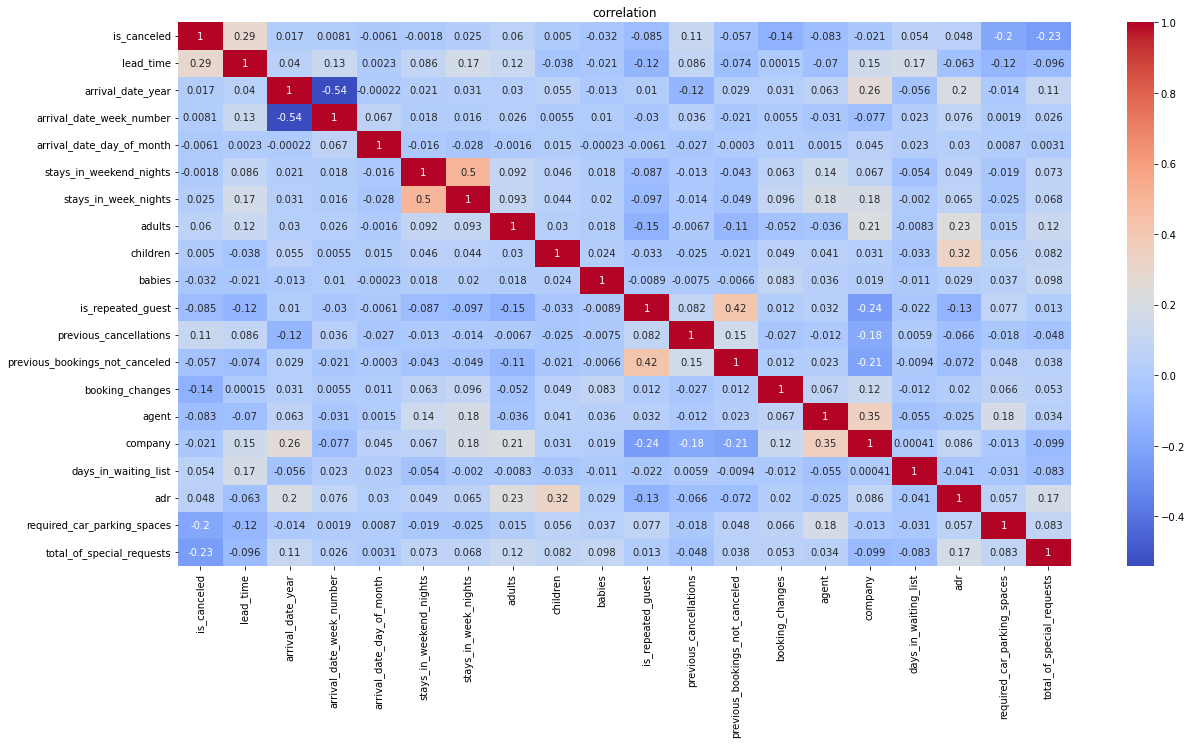

In [290]:
correlation =  df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('correlation')
plt.show

In [291]:
correlation['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293123
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
children                          0.005048
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
company                          -0.020642
babies                           -0.032491
previous_bookings_not_canceled   -0.057358
agent                            -0.083114
is_repeated_guest                -0.084793
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

- We will drop cols that not important with Label and countain more nulls 

- cols = [`agent`, `company`, `children`]

In [293]:
df.drop(['company', 'children'], axis=1, inplace=True)

In [294]:
df.shape

(119390, 34)

In [295]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


### 2- Check Unique Values

In [296]:
for col in df.columns:

    if df[col].dtype == 'object':

        print(f"Unique values in column {col}: {df[col].nunique()}")
        print('----------------------------------------------')


Unique values in column hotel: 2
----------------------------------------------
Unique values in column arrival_date_month: 12
----------------------------------------------
Unique values in column meal: 5
----------------------------------------------
Unique values in column country: 177
----------------------------------------------
Unique values in column market_segment: 8
----------------------------------------------
Unique values in column distribution_channel: 5
----------------------------------------------
Unique values in column reserved_room_type: 10
----------------------------------------------
Unique values in column assigned_room_type: 12
----------------------------------------------
Unique values in column deposit_type: 3
----------------------------------------------
Unique values in column customer_type: 4
----------------------------------------------
Unique values in column reservation_status: 3
----------------------------------------------
Unique values in column

In [297]:
for col in df.columns:

    if df[col].dtype == 'object':

        print(f"Unique values in column {col}: {df[col].unique()}")
        print('----------------------------------------------')


Unique values in column hotel: ['Resort Hotel' 'City Hotel']
----------------------------------------------
Unique values in column arrival_date_month: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------
Unique values in column meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------
Unique values in column country: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM'

In [298]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

1- BB (Bed & Breakfast)

2- HB (Half Board)

3- FB (Full Board)

4- SC (Self Catering)

- more unique values in `phone-number`, `credit_card`, `name`, `email`,  and this col is not important with Label 

- col `reservation_status_date` we will solve it by change dtype

In [299]:
df.drop(['phone-number', 'credit_card', 'name', 'email'], axis=1, inplace=True)

In [300]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

### 3- Check Duplicates

In [301]:
df[df.duplicated(keep='first')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


- we will drop duplicates from data

### 4- Check Outliers

In [302]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


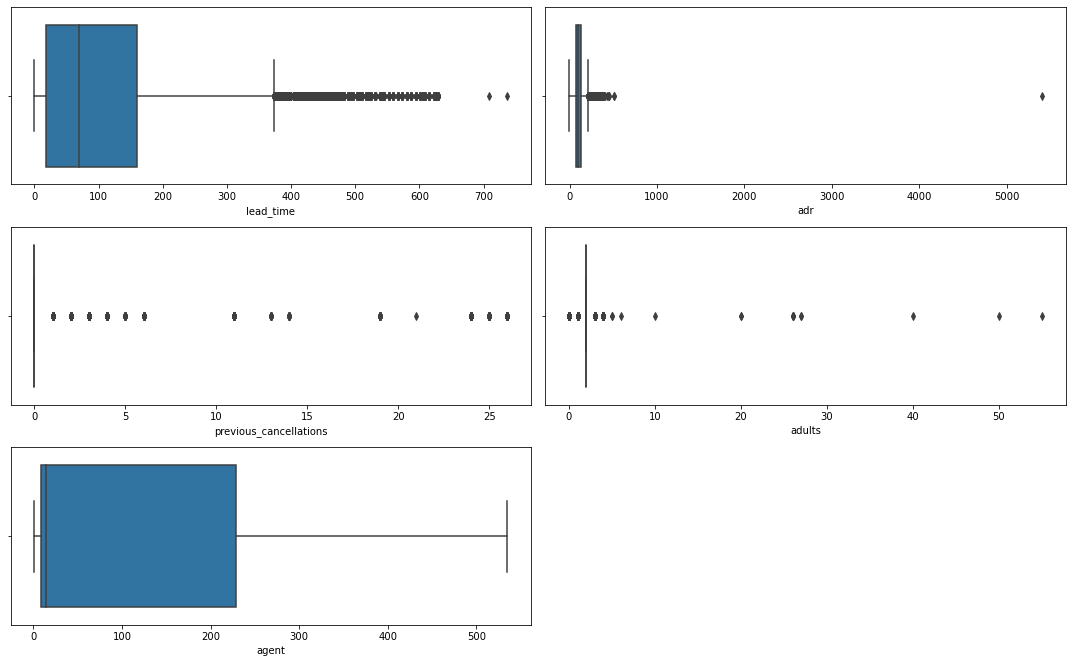

In [303]:
plt.figure(figsize=(15, 15))

plt.subplot(5, 2, 1)  
sns.boxplot(x='lead_time', data=df)

plt.subplot(5, 2, 2)  
sns.boxplot(x='adr', data=df) 

plt.subplot(5, 2, 3)  
sns.boxplot(x='previous_cancellations', data=df) 

plt.subplot(5, 2, 4)  
sns.boxplot(x='adults', data=df)

plt.subplot(5, 2, 5)  
sns.boxplot(x='agent', data=df)

plt.tight_layout()
plt.show()

- This important cols with Label , We will handling it by IQR 

### 5- Check Distribution Of Data

Text(0.5, 0, 'agent')

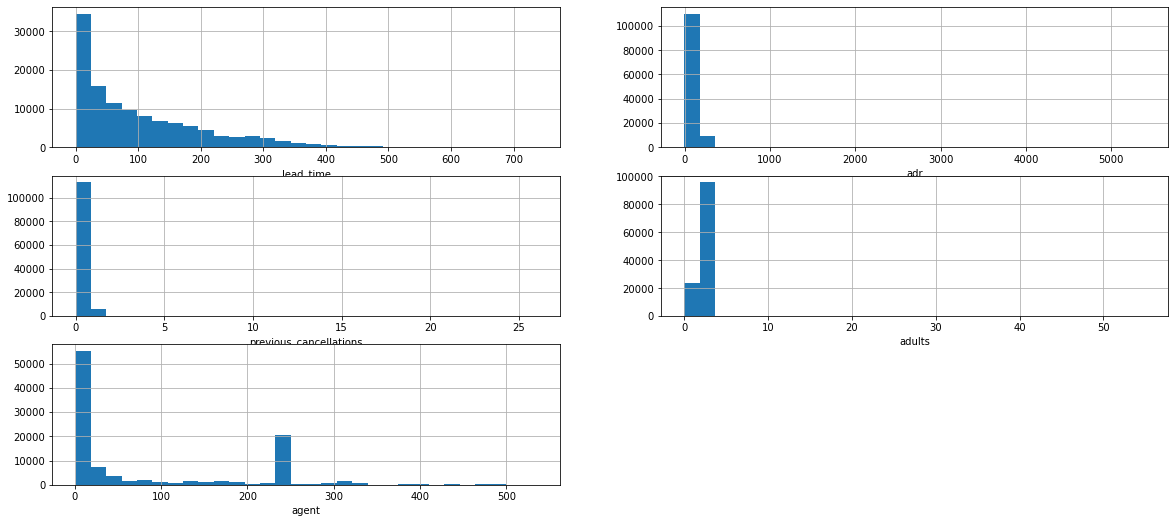

In [304]:
plt.figure(figsize=(20, 15))

plt.subplot(5, 2, 1)
fig = df['lead_time'].hist(bins=30)
fig.set_xlabel('lead_time')


plt.subplot(5, 2, 2)
fig = df['adr'].hist(bins=30)
fig.set_xlabel('adr')


plt.subplot(5, 2, 3)
fig = df['previous_cancellations'].hist(bins=30)
fig.set_xlabel('previous_cancellations')

plt.subplot(5, 2, 4)
fig = df['adults'].hist(bins=30)
fig.set_xlabel('adults')

plt.subplot(5, 2, 5)
fig = df['agent'].hist(bins=30)
fig.set_xlabel('agent')

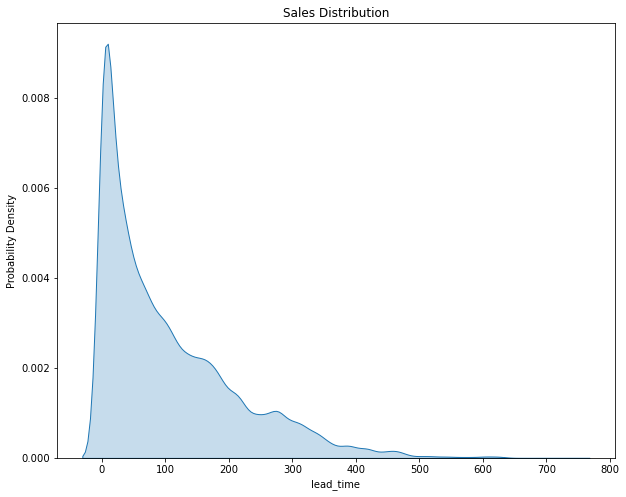

In [305]:
plt.figure(figsize=(10, 8))
sns.kdeplot(df['lead_time'], fill=True)

plt.xlabel('lead_time') 
plt.ylabel('Probability Density') 
plt.title('Sales Distribution') 
plt.show()

# 4- Preprocessing

In [306]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


### 1- Detect Nulls 

In [307]:
total_nulls = df.isnull().sum()
percent_nulls = (total_nulls/df.isnull().count()*100)

nulls_in_data = pd.DataFrame({'Total_Nulls':total_nulls, '% nulls':percent_nulls})
nulls_in_data.sort_values(by='Total_Nulls', ascending=False)

,Total_Nulls,% nulls
agent,16340,13.686238
country,488,0.408744
hotel,0,0.000000
previous_cancellations,0,0.000000
reservation_status,0,0.000000
total_of_special_requests,0,0.000000
required_car_parking_spaces,0,0.000000
adr,0,0.000000
customer_type,0,0.000000
days_in_waiting_list,0,0.000000


In [308]:
msno = missingno

<AxesSubplot:>

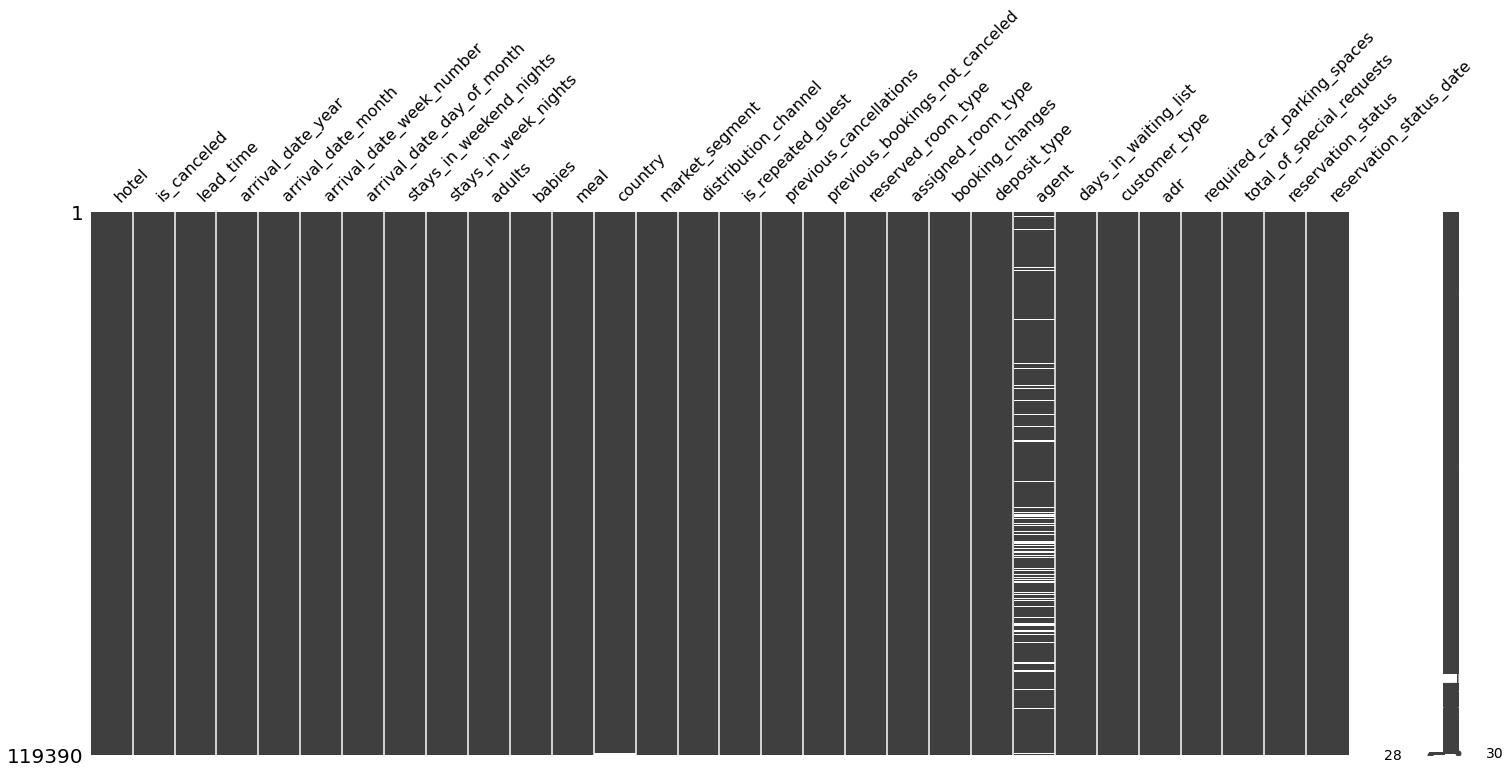

In [309]:
msno.matrix(df.sort_values(by='country'))

<AxesSubplot:>

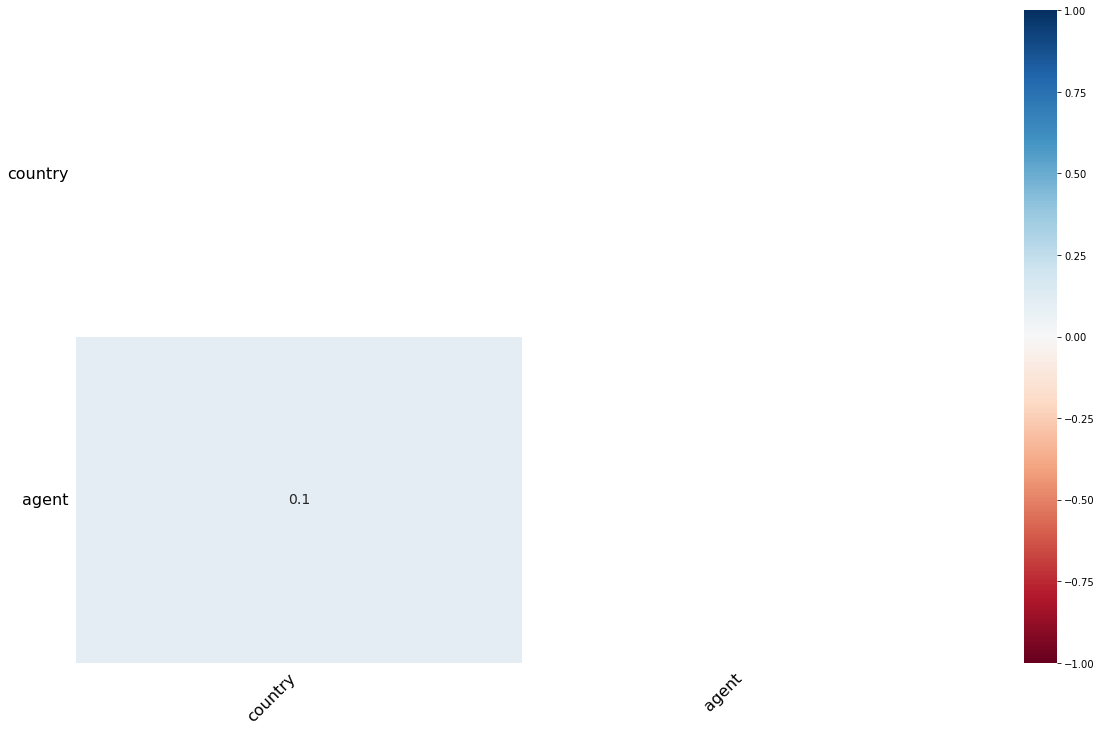

In [310]:
msno.heatmap(df)

- i think we can find relation betweena `agent` and `distribution_channel` , so we can detect null by it

In [311]:
agent_null_by_distribution = df[df['agent'].isnull()]
agent_null_by_distribution

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,0,BB,FRA,Corporate,Corporate,0,0,0,A,G,0,No Deposit,NaN,0,Transient,107.42,0,0,Check-Out,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119124,City Hotel,0,0,2017,August,35,29,0,1,1,0,BB,PRT,Complementary,Corporate,0,0,0,A,A,0,No Deposit,NaN,0,Transient,0.00,0,2,Check-Out,2017-08-30
119151,City Hotel,0,0,2017,August,35,29,0,1,2,0,BB,NLD,Direct,Direct,0,0,0,G,G,0,No Deposit,NaN,0,Transient,270.00,0,0,Check-Out,2017-08-30
119166,City Hotel,0,0,2017,August,35,30,0,1,1,0,BB,BRA,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,0,Transient,140.00,0,0,Check-Out,2017-08-31
119215,City Hotel,0,2,2017,August,35,31,0,1,1,0,SC,LBN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,0,Transient,140.00,0,2,Check-Out,2017-09-01


In [312]:
df['distribution_channel'].value_counts(normalize=True)

TA/TO        0.819750
Direct       0.122665
Corporate    0.055926
GDS          0.001617
Undefined    0.000042
Name: distribution_channel, dtype: float64

In [313]:
df['deposit_type'].value_counts(normalize=True)

No Deposit    0.876464
Non Refund    0.122179
Refundable    0.001357
Name: deposit_type, dtype: float64

In [315]:
agent_null_by_distribution['distribution_channel'].value_counts(normalize=True)

Direct       0.466646
Corporate    0.339229
TA/TO        0.193819
Undefined    0.000184
GDS          0.000122
Name: distribution_channel, dtype: float64

In [316]:
Median_agent_by_channel_direct = df[df['distribution_channel'] == 'Direct']['agent'].median()
Median_agent_by_channel_direct

14.0

In [317]:
df.loc[df['distribution_channel'].str.contains('Direct'), 'agent'] = df[df['distribution_channel'].str.contains('Direct')]['agent'].fillna(Median_agent_by_channel_direct)

In [318]:
Median_agent_by_channel_Corporate = df[df['distribution_channel'] == 'Corporate']['agent'].median()
Median_agent_by_channel_Corporate

191.0

In [319]:
df.loc[df['distribution_channel'].str.contains('Corporate'), 'agent'] = df[df['distribution_channel'].str.contains('Corporate')]['agent'].fillna(Median_agent_by_channel_Corporate)

In [320]:
Median_agent_by_channel_TATO = df[df['distribution_channel'] == 'TA/TO']['agent'].median()
Median_agent_by_channel_TATO

9.0

In [321]:
df.loc[df['distribution_channel'].str.contains('TA/TO'), 'agent'] = df[df['distribution_channel'].str.contains('TA/TO')]['agent'].fillna(Median_agent_by_channel_TATO)

In [322]:
Median_agent_by_channel_undef = df[df['distribution_channel'] == 'Undefined']['agent'].median()
Median_agent_by_channel_undef

11.5

In [323]:
df.loc[df['distribution_channel'].str.contains('Undefined'), 'agent'] = df[df['distribution_channel'].str.contains('Undefined')]['agent'].fillna(Median_agent_by_channel_undef)

In [324]:
Median_agent_by_channel_GDS = df[df['distribution_channel'] == 'GDS']['agent'].median()
Median_agent_by_channel_GDS

195.0

In [325]:
df.loc[df['distribution_channel'].str.contains('GDS'), 'agent'] = df[df['distribution_channel'].str.contains('GDS')]['agent'].fillna(Median_agent_by_channel_GDS)

- Nulls in `agent` detected 

- i think `country` col is important with Label , in this time we will drop it but in reality business we talk to business and he will discuss what will we do 

In [326]:
df.dropna(subset=['country'], inplace=True)

In [327]:
total_nulls = df.isnull().sum()
percent_nulls = (total_nulls/df.isnull().count()*100)

nulls_in_data = pd.DataFrame({'Total_Nulls':total_nulls, '% nulls':percent_nulls})
nulls_in_data.sort_values(by='Total_Nulls', ascending=False)

,Total_Nulls,% nulls
hotel,0,0.0
is_canceled,0,0.0
reservation_status,0,0.0
total_of_special_requests,0,0.0
required_car_parking_spaces,0,0.0
adr,0,0.0
customer_type,0,0.0
days_in_waiting_list,0,0.0
agent,0,0.0
deposit_type,0,0.0


- All Nulls Are Detected

### 2- Detect Duplicates

In [328]:
df.duplicated().sum()

31996

In [329]:
df1 = df.drop_duplicates(keep='first')

In [330]:
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,14.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


### 3- Fix Dtypes In Data

In [331]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86906 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86906 non-null  object        
 1   is_canceled                     86906 non-null  int64         
 2   lead_time                       86906 non-null  int64         
 3   arrival_date_year               86906 non-null  int64         
 4   arrival_date_month              86906 non-null  object        
 5   arrival_date_week_number        86906 non-null  int64         
 6   arrival_date_day_of_month       86906 non-null  int64         
 7   stays_in_weekend_nights         86906 non-null  int64         
 8   stays_in_week_nights            86906 non-null  int64         
 9   adults                          86906 non-null  int64         
 10  babies                          86906 non-null  int64         
 11  m

Fix `arrival_date_month` and change it to datetime

In [332]:
df1['arrival_date'] = pd.to_datetime(df1['arrival_date_year'].astype(str) + '-' + df1['arrival_date_month'], format='%Y-%B')

df1['arrival_date_month'] = df1['arrival_date'].dt.month

C:\Users\MEGAST~1\AppData\Local\Temp/ipykernel_14984/1677031269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['arrival_date'] = pd.to_datetime(df1['arrival_date_year'].astype(str) + '-' + df1['arrival_date_month'], format='%Y-%B')
C:\Users\MEGAST~1\AppData\Local\Temp/ipykernel_14984/1677031269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['arrival_date_month'] = df1['arrival_date'].dt.month


In [333]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86906 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86906 non-null  object        
 1   is_canceled                     86906 non-null  int64         
 2   lead_time                       86906 non-null  int64         
 3   arrival_date_year               86906 non-null  int64         
 4   arrival_date_month              86906 non-null  int64         
 5   arrival_date_week_number        86906 non-null  int64         
 6   arrival_date_day_of_month       86906 non-null  int64         
 7   stays_in_weekend_nights         86906 non-null  int64         
 8   stays_in_week_nights            86906 non-null  int64         
 9   adults                          86906 non-null  int64         
 10  babies                          86906 non-null  int64         
 11  m

- We will handling other objects by encoding and drop non important with Label

### 4- Treat Outliers

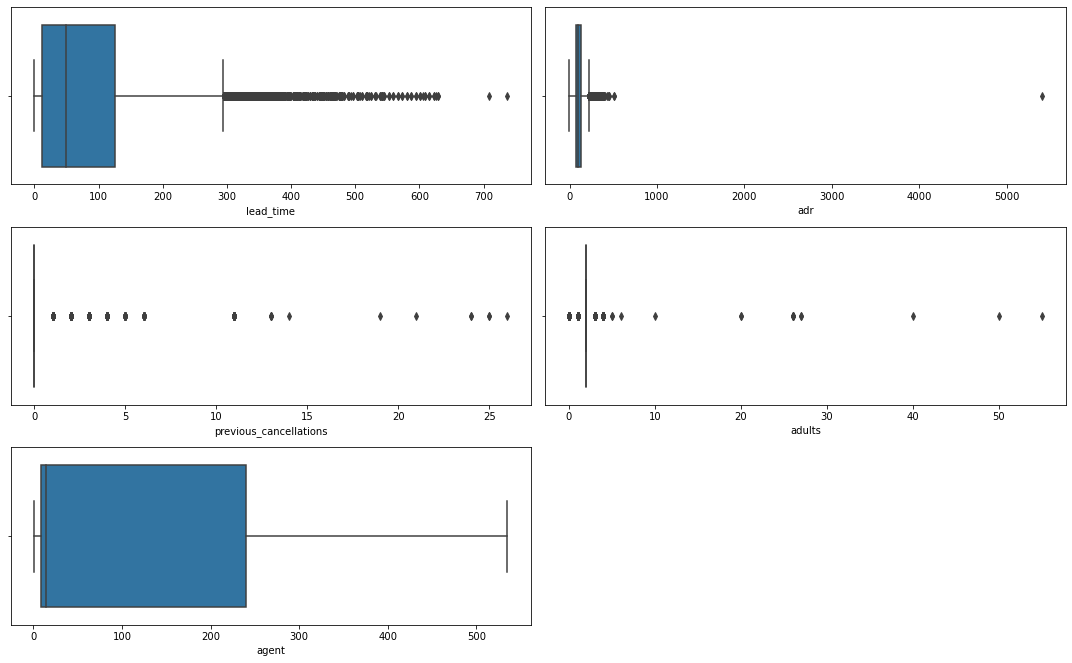

In [334]:
plt.figure(figsize=(15, 15))

plt.subplot(5, 2, 1)  
sns.boxplot(x='lead_time', data=df1)

plt.subplot(5, 2, 2)  
sns.boxplot(x='adr', data=df1) 

plt.subplot(5, 2, 3)  
sns.boxplot(x='previous_cancellations', data=df1) 

plt.subplot(5, 2, 4)  
sns.boxplot(x='adults', data=df1)

plt.subplot(5, 2, 5)  
sns.boxplot(x='agent', data=df1)

plt.tight_layout()
plt.show()

- we will drop `previous_cancellations` and `adults` cols because this invalid cols and too mich outliers  

In [335]:
df1.drop(columns=['previous_cancellations', 'adults'], inplace=True)

c:\Users\MEGASTORE\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [336]:
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,0,BB,PRT,Direct,Direct,0,0,C,C,3,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,0,BB,PRT,Direct,Direct,0,0,C,C,4,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,0,BB,GBR,Direct,Direct,0,0,A,C,0,No Deposit,14.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,7,27,1,0,1,0,BB,GBR,Corporate,Corporate,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,7,27,1,0,2,0,BB,GBR,Online TA,TA/TO,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,0,BB,BEL,Offline TA/TO,TA/TO,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-01
119386,City Hotel,0,102,2017,8,35,31,2,5,0,BB,FRA,Online TA,TA/TO,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-01
119387,City Hotel,0,34,2017,8,35,31,2,5,0,BB,DEU,Online TA,TA/TO,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-01
119388,City Hotel,0,109,2017,8,35,31,2,5,0,BB,GBR,Online TA,TA/TO,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-01


In [337]:
def detect_outliers_iqr_and_Treat(DataFrame,Feature):
    outliers = []
    
    data = sorted(DataFrame[Feature])
    print("Feature name is ",Feature)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lower_limit = q1-(1.6*IQR)
    upper_limit = q3+(1.6*IQR)
    print('lower limit: ', lower_limit)
    print('upper limit: ', upper_limit)
    print('IQR:' , IQR)
    
    for i in data: 
        if ((i<lower_limit) or (i>upper_limit)):
            outliers.append(i)
    if len(outliers)>0:        
        print("Outliers from IQR method: ", outliers[:5])

        #Capping  
        DataFrame_c = DataFrame.copy()
        DataFrame_c[Feature] = np.where(DataFrame_c[Feature]>upper_limit, upper_limit , DataFrame_c[Feature]) 
        DataFrame_c[Feature] = np.where(DataFrame_c[Feature]<lower_limit , lower_limit , DataFrame_c[Feature])

        #compare
        plt.figure(figsize=(15,5))

        plt.subplot(2,2,1)
        sns.displot(DataFrame[Feature])

        plt.subplot(2,2,2)
        sns.boxplot(DataFrame[Feature])

        plt.subplot(2,2,3)
        sns.displot(DataFrame_c[Feature])

        plt.subplot(2,2,4)
        sns.boxplot(DataFrame_c[Feature])
        plt.show()
        
        return outliers,DataFrame_c
    else:
        print("This feature has no Outliers from IQR method")
        return outliers,DataFrame

_________________________________________________________________________________________
Feature name is  lead_time
lower limit:  -168.8
upper limit:  305.8
IQR: 113.0
Outliers from IQR method:  [306, 306, 306, 306, 306]


c:\Users\MEGASTORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\MEGASTORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


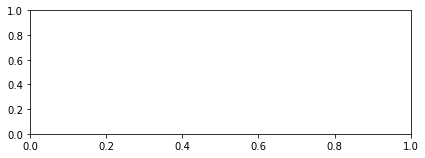

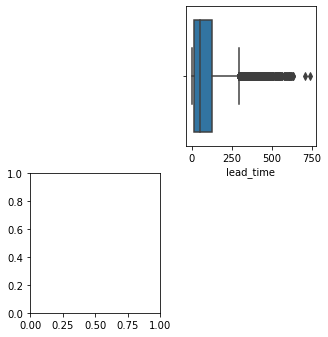

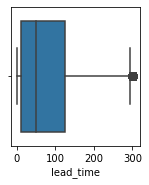

_________________________________________________________________________________________
Feature name is  adr
lower limit:  -26.709999999999994
upper limit:  233.06
IQR: 61.849999999999994
Outliers from IQR method:  [233.1, 233.1, 233.1, 233.1, 233.1]


c:\Users\MEGASTORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\MEGASTORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


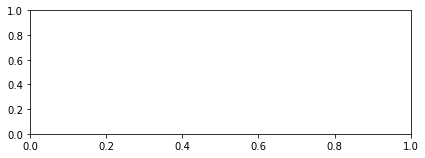

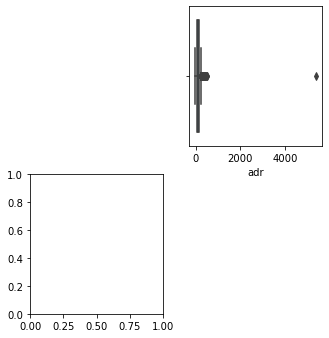

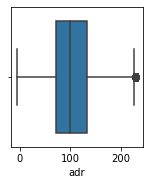

_________________________________________________________________________________________
Feature name is  agent
lower limit:  -360.6
upper limit:  609.6
IQR: 231.0
This feature has no Outliers from IQR method


In [338]:
df2 = df1.copy()
outliers_dict_Auto = {}
cols_to_check = ['lead_time', 'adr', 'agent']
for col in cols_to_check:
    print("_________________________________________________________________________________________")
    outliers,df2 = detect_outliers_iqr_and_Treat(df2,col)
    outliers_dict_Auto[col+"_outliers"]=outliers

In [339]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,babies,is_repeated_guest,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000
mean,0.275850,80.188215,2016.211712,6.476457,26.840932,15.816284,1.007502,2.628840,0.010839,0.039249,0.176777,0.271891,91.525769,0.751789,106.565144,0.083469,0.699572
std,0.446944,86.100201,0.686072,3.092815,13.654423,8.834639,1.028813,2.043866,0.113614,0.194189,1.718218,0.728176,109.877673,10.026561,54.960832,0.280434,0.831871
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,7.000000,27.000000,16.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,98.400000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,9.000000,37.000000,23.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,16.000000,41.000000,10.000000,1.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [340]:
df2.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,babies,is_repeated_guest,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000
mean,0.275850,78.907686,2016.211712,6.476457,26.840932,15.816284,1.007502,2.628840,0.010839,0.039249,0.176777,0.271891,91.525769,0.751789,105.726300,0.083469,0.699572
std,0.446944,81.771238,0.686072,3.092815,13.654423,8.834639,1.028813,2.043866,0.113614,0.194189,1.718218,0.728176,109.877673,10.026561,49.503739,0.280434,0.831871
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,7.000000,27.000000,16.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,98.400000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,9.000000,37.000000,23.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,305.800000,2017.000000,12.000000,53.000000,31.000000,16.000000,41.000000,10.000000,1.000000,72.000000,21.000000,535.000000,391.000000,233.060000,8.000000,5.000000


- We Handling Outliers Successfully 

### 5- Handling Dtypes

- We will handle categorical objects by OneHotEndoing , but others more unique we will drop it because it make a complexity model

In [341]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86906 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86906 non-null  object        
 1   is_canceled                     86906 non-null  int64         
 2   lead_time                       86906 non-null  float64       
 3   arrival_date_year               86906 non-null  int64         
 4   arrival_date_month              86906 non-null  int64         
 5   arrival_date_week_number        86906 non-null  int64         
 6   arrival_date_day_of_month       86906 non-null  int64         
 7   stays_in_weekend_nights         86906 non-null  int64         
 8   stays_in_week_nights            86906 non-null  int64         
 9   babies                          86906 non-null  int64         
 10  meal                            86906 non-null  object        
 11  c

In [342]:
for col in df2.columns:

    if df2[col].dtype == 'object':

        print(f"Unique values in column {col}: {df2[col].nunique()}")
        print('----------------------------------------------')


Unique values in column hotel: 2
----------------------------------------------
Unique values in column meal: 5
----------------------------------------------
Unique values in column country: 177
----------------------------------------------
Unique values in column market_segment: 8
----------------------------------------------
Unique values in column distribution_channel: 5
----------------------------------------------
Unique values in column reserved_room_type: 10
----------------------------------------------
Unique values in column assigned_room_type: 12
----------------------------------------------
Unique values in column deposit_type: 3
----------------------------------------------
Unique values in column customer_type: 4
----------------------------------------------
Unique values in column reservation_status: 3
----------------------------------------------


- We will fix less uniques by (Encoding) but more uniques we will drop it after data analysis 

In [343]:
correlation = df2.corr()

In [344]:
correlation['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.187060
adr                               0.135515
arrival_date_year                 0.087460
stays_in_week_nights              0.082769
stays_in_weekend_nights           0.059587
arrival_date_day_of_month         0.005063
days_in_waiting_list              0.004443
arrival_date_month                0.003179
arrival_date_week_number          0.000919
babies                           -0.020587
agent                            -0.033419
previous_bookings_not_canceled   -0.050554
is_repeated_guest                -0.090144
booking_changes                  -0.094049
total_of_special_requests        -0.121593
required_car_parking_spaces      -0.183705
Name: is_canceled, dtype: float64

# 5- Analysis and Visualization

In [345]:
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,305.8,2015,7,27,1,0,0,0,BB,PRT,Direct,Direct,0,0,C,C,3,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,305.8,2015,7,27,1,0,0,0,BB,PRT,Direct,Direct,0,0,C,C,4,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7.0,2015,7,27,1,0,1,0,BB,GBR,Direct,Direct,0,0,A,C,0,No Deposit,14.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13.0,2015,7,27,1,0,1,0,BB,GBR,Corporate,Corporate,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14.0,2015,7,27,1,0,2,0,BB,GBR,Online TA,TA/TO,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23.0,2017,8,35,30,2,5,0,BB,BEL,Offline TA/TO,TA/TO,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-01
119386,City Hotel,0,102.0,2017,8,35,31,2,5,0,BB,FRA,Online TA,TA/TO,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-01
119387,City Hotel,0,34.0,2017,8,35,31,2,5,0,BB,DEU,Online TA,TA/TO,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-01
119388,City Hotel,0,109.0,2017,8,35,31,2,5,0,BB,GBR,Online TA,TA/TO,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-01


### 1- what is the avg for evey `hotel` by `adr` ?

In [346]:
avg_hotel = df2.groupby('hotel')['adr'].mean()
avg_hotel

hotel
City Hotel      110.583131
Resort Hotel     97.987257
Name: adr, dtype: float64

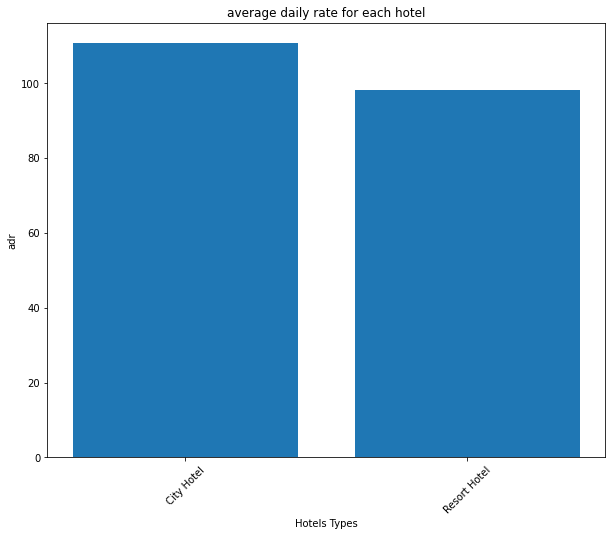

In [347]:
plt.figure(figsize=(10, 8))

plt.bar(avg_hotel.index, avg_hotel.values) 

plt.xticks(rotation=45) 
plt.xlabel('Hotels Types') 
plt.ylabel('adr') 
plt.title('average daily rate for each hotel') 
plt.show()

- in 'City Hotel' we look Average Daily Rate (adr) more than 'Resort Hotel' , i think it's logical 

### 2- what is percentage of cancellation for each `hotel` ?   

In [348]:
avg_hotel_cancelation = df2.groupby('hotel')['is_canceled'].value_counts(normalize=True)
avg_hotel_cancelation

hotel         is_canceled
City Hotel    0              0.699790
              1              0.300210
Resort Hotel  0              0.762966
              1              0.237034
Name: is_canceled, dtype: float64

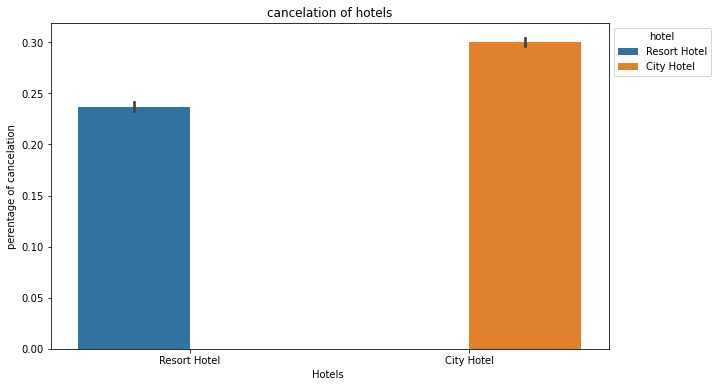

In [349]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x='hotel', y='is_canceled', hue='hotel', data=df2) 
plt.xlabel('Hotels ') 
plt.ylabel('perentage of cancelation') 
plt.title('cancelation of hotels') 
plt.legend(title='hotel', bbox_to_anchor=(1, 1)) 
plt.show()

- We found the {Resort Hotel} percentage of canceled less than {City Hotel}

- {Resort Hotel} = 23.7%

- {City Hotel} = 30%

- i think this because the `adr` in Resort Hotel less than City Hotel

### 3- What is the most `meal` in City Hotel ?

In [350]:
df2.groupby('meal')['adr'].mean().sort_values(ascending=False)

meal
FB           136.016379
HB           129.842194
BB           103.390697
Undefined    102.525471
SC            98.349905
Name: adr, dtype: float64

In [351]:
df2['meal'].replace('Undefined', 'BB', inplace=True)

In [352]:
df2.groupby('meal')['adr'].mean().sort_values(ascending=False)

meal
FB    136.016379
HB    129.842194
BB    103.384490
SC     98.349905
Name: adr, dtype: float64

In [353]:
df2[df2['hotel'] == 'City Hotel'].groupby('meal')['adr'].mean().sort_values(ascending=False)

meal
HB    135.667863
BB    111.508920
SC     99.140600
FB     53.590909
Name: adr, dtype: float64

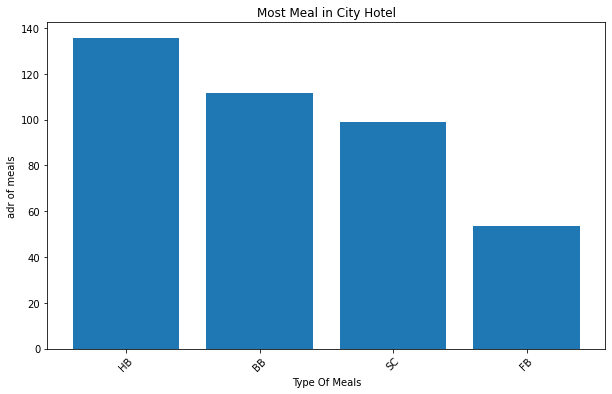

In [354]:
Most_Meal_in_City_Hotel = df2[df2['hotel'] == 'City Hotel'].groupby('meal')['adr'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6)) 
plt.bar(Most_Meal_in_City_Hotel.index, Most_Meal_in_City_Hotel.values) 
plt.xticks(rotation=45) 
plt.xlabel('Type Of Meals') 
plt.ylabel('adr of meals') 
plt.title('Most Meal in City Hotel') 
plt.show()

- Half Board (HB) is the most meal in City Hotel

### 4- What is the most `meal` in Resort Hotel ?

In [355]:
df2[df2['hotel'] == 'Resort Hotel'].groupby('meal')['adr'].mean().sort_values(ascending=False)

meal
FB    138.621782
HB    127.247943
BB     90.902634
SC      5.512375
Name: adr, dtype: float64

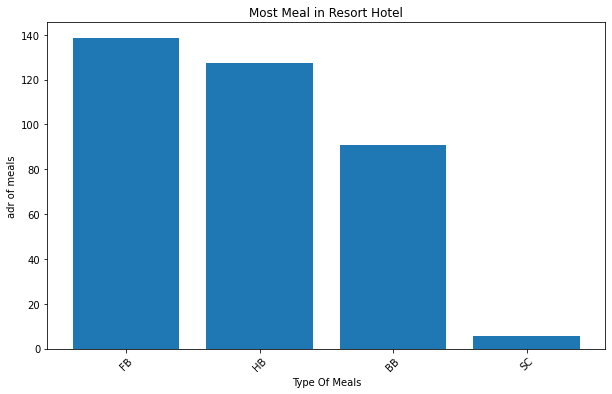

In [356]:
Most_Meal_in_Resort_Hotel = df2[df2['hotel'] == 'Resort Hotel'].groupby('meal')['adr'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6)) 
plt.bar(Most_Meal_in_Resort_Hotel.index, Most_Meal_in_Resort_Hotel.values) 
plt.xticks(rotation=45) 
plt.xlabel('Type Of Meals') 
plt.ylabel('adr of meals') 
plt.title('Most Meal in Resort Hotel') 
plt.show()

- Full Board (FB) most meal in Resort Hotel , i think it's logical because the adr in Resort Hotel less than City Hotel

### 5- What is the most and least month has a percent of cancellation ?

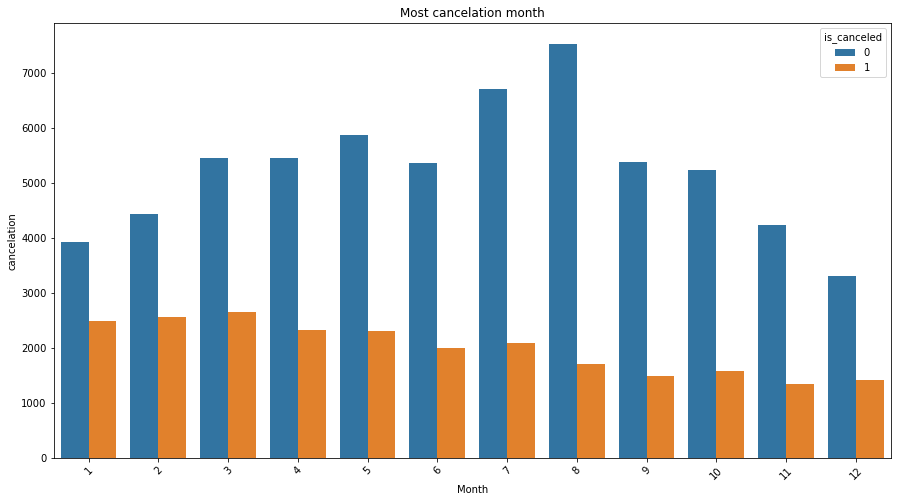

In [357]:
plt.figure(figsize=(15, 8))
 
df2['Month'] = df2['reservation_status_date'].dt.month
sns.countplot(x='Month', hue='is_canceled', data=df2)
plt.xlabel('Month') 
plt.ylabel('cancelation') 
plt.title('Most cancelation month') 
plt.xticks(rotation=45) 
plt.legend(title= 'is_canceled' ,bbox_to_anchor=(1,1))
plt.show()

- We see the most percentage of cancelation In 3 , so we can report this analysis to business and they solve it

- least percentage of cancelation in 8 to 12

### 6- What is the average of `adr` for every year

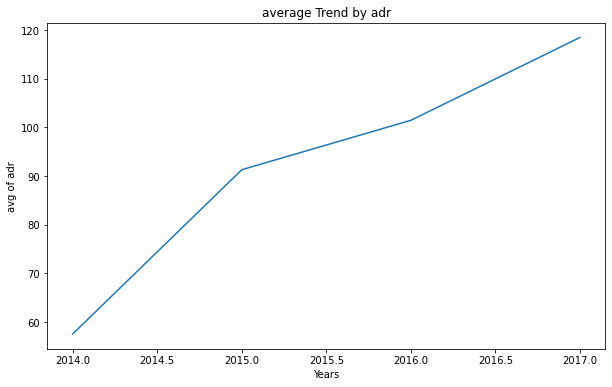

In [358]:
plt.figure(figsize=(15, 8))
df2['Year'] = df2['reservation_status_date'].dt.year
adr_for_every_year = df2.groupby('Year')['adr'].mean()
adr_for_every_year.plot(kind='line', figsize=(10, 6))
plt.xlabel('Years') 
plt.ylabel('avg of adr') 
plt.title('average Trend by adr') 
plt.show()

- We see the `adr` increasd year by year 

### 7- What is the average of `adr` for every day

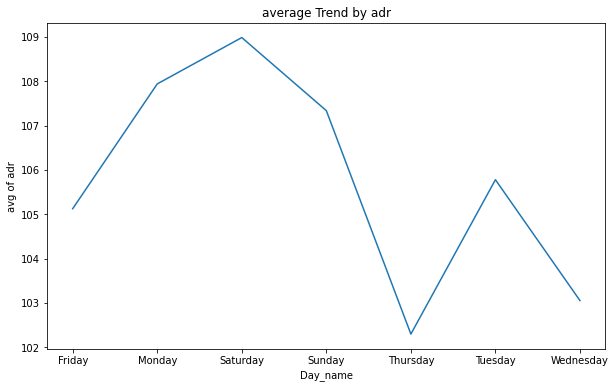

In [359]:
plt.figure(figsize=(15, 8))
df2['Day_name'] = df2['reservation_status_date'].dt.day_name()
adr_for_every_year = df2.groupby('Day_name')['adr'].mean()
adr_for_every_year.plot(kind='line', figsize=(10, 6))
plt.xlabel('Day_name') 
plt.ylabel('avg of adr') 
plt.title('average Trend by adr') 
plt.show()

- We see the `adr` in (Saturday) most day because this is a holiday and more of people was booking

- Less day is (Wednesday)

### 8- What is the `country` with the highest cancellation rate ?

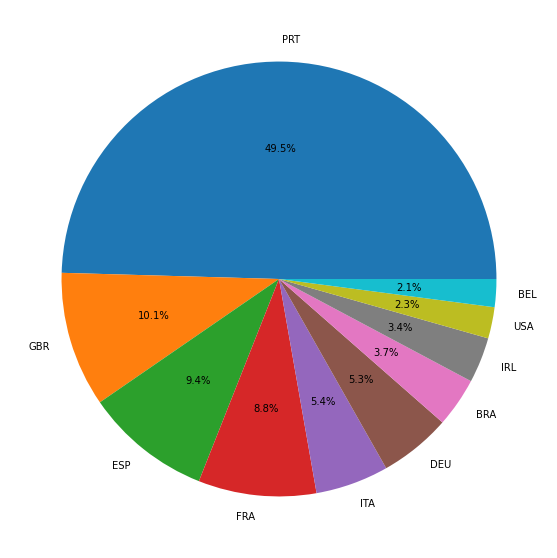

In [360]:
plt.figure(facecolor='white',figsize=(10, 10))
cancelation = df2[df2['is_canceled'] == 1]
every_country = cancelation['country'].value_counts()[:10]
plt.pie(every_country, labels=every_country.index, autopct='%1.1f%%')
plt.show()

- Portugal (PRT) has a highest cancellation rate ! , see why in next visualize =>>

In [361]:
not_cancelation = df2[df2['is_canceled'] == 0]

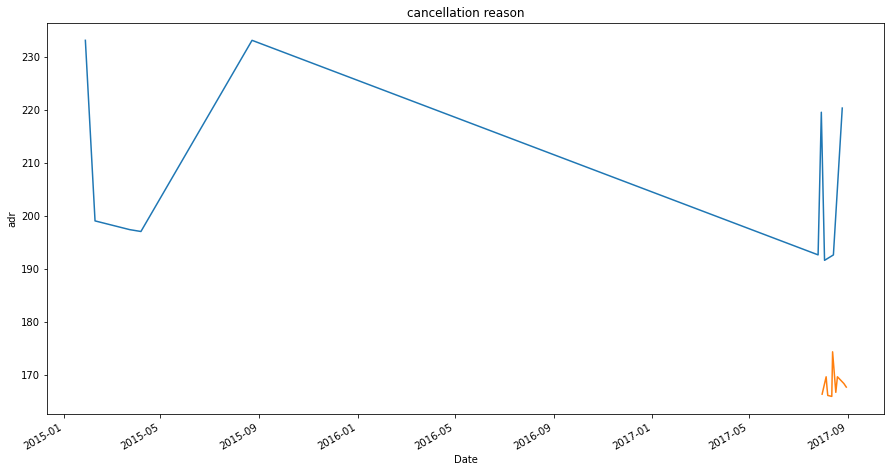

In [362]:
plt.figure(figsize=(15, 8))
cancellation_date = cancelation.groupby('reservation_status_date')['adr'].mean().sort_values(ascending=False)[:10]
not_cancellation_date = not_cancelation.groupby('reservation_status_date')['adr'].mean().sort_values(ascending=False)[:10]
cancellation_date.plot(kind='line')
not_cancellation_date.plot(kind='line')
plt.xlabel('Date') 
plt.ylabel('adr') 
plt.title('cancellation reason') 
plt.show()

- we look cancellation in this Dates and countries because the `adr` was very expensive

### 9- What is the best type of users for booking 

In [363]:
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,Month,Year,Day_name
0,Resort Hotel,0,305.8,2015,7,27,1,0,0,0,BB,PRT,Direct,Direct,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,2015,Wednesday
1,Resort Hotel,0,305.8,2015,7,27,1,0,0,0,BB,PRT,Direct,Direct,0,0,C,C,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,2015,Wednesday
2,Resort Hotel,0,7.0,2015,7,27,1,0,1,0,BB,GBR,Direct,Direct,0,0,A,C,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,2015,Thursday
3,Resort Hotel,0,13.0,2015,7,27,1,0,1,0,BB,GBR,Corporate,Corporate,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,2015,Thursday
4,Resort Hotel,0,14.0,2015,7,27,1,0,2,0,BB,GBR,Online TA,TA/TO,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,2015,Friday


In [364]:
marketing_booking = df2['market_segment'].value_counts()
marketing_booking

Online TA        51516
Offline TA/TO    13857
Direct           11643
Groups            4936
Corporate         4027
Complementary      698
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

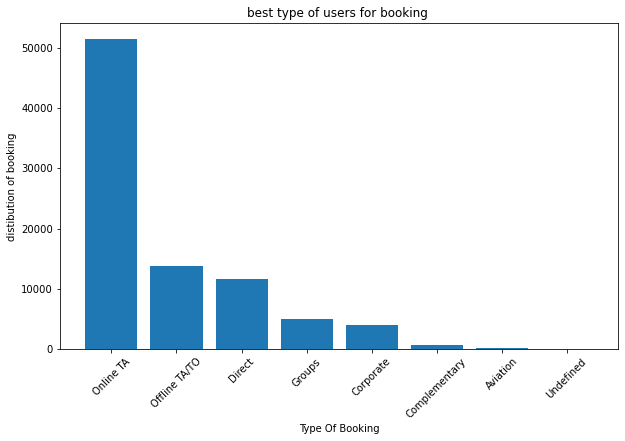

In [365]:
plt.figure(figsize=(10, 6)) 
plt.bar(marketing_booking.index, marketing_booking.values) 
plt.xticks(rotation=45) 
plt.xlabel('Type Of Booking') 
plt.ylabel('distibution of booking') 
plt.title('best type of users for booking ') 
plt.show()

- We look best type of booking for users is (Online TA) and this locgical in the age of the internet

### 10- Make classes of users by `meals` and `adr`

In [366]:
adr_meals = df2.groupby('meal')['adr'].mean().sort_values(ascending=False)
df2['meal_adr'] = df2['meal'].map(adr_meals)

In [367]:
adr_meals

meal
FB    136.016379
HB    129.842194
BB    103.384490
SC     98.349905
Name: adr, dtype: float64

In [368]:
def classesusersbymeal(x):
    x = float(x)
    if x >= 136.0:
        return 'A'
    elif x >= 129.8:
        return 'B'
    elif x >= 103.3:
        return 'C'
    elif x >= 98.3:
        return 'D'

df2['meal_classes'] = df2['meal_adr'].apply(lambda x: classesusersbymeal(x))       

In [369]:
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,Month,Year,Day_name,meal_adr,meal_classes
0,Resort Hotel,0,305.8,2015,7,27,1,0,0,0,BB,PRT,Direct,Direct,0,0,C,C,3,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,7,2015,Wednesday,103.384490,C
1,Resort Hotel,0,305.8,2015,7,27,1,0,0,0,BB,PRT,Direct,Direct,0,0,C,C,4,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,7,2015,Wednesday,103.384490,C
2,Resort Hotel,0,7.0,2015,7,27,1,0,1,0,BB,GBR,Direct,Direct,0,0,A,C,0,No Deposit,14.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,7,2015,Thursday,103.384490,C
3,Resort Hotel,0,13.0,2015,7,27,1,0,1,0,BB,GBR,Corporate,Corporate,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,7,2015,Thursday,103.384490,C
4,Resort Hotel,0,14.0,2015,7,27,1,0,2,0,BB,GBR,Online TA,TA/TO,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,7,2015,Friday,103.384490,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23.0,2017,8,35,30,2,5,0,BB,BEL,Offline TA/TO,TA/TO,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-01,9,2017,Wednesday,103.384490,C
119386,City Hotel,0,102.0,2017,8,35,31,2,5,0,BB,FRA,Online TA,TA/TO,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-01,9,2017,Thursday,103.384490,C
119387,City Hotel,0,34.0,2017,8,35,31,2,5,0,BB,DEU,Online TA,TA/TO,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-01,9,2017,Thursday,103.384490,C
119388,City Hotel,0,109.0,2017,8,35,31,2,5,0,BB,GBR,Online TA,TA/TO,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-01,9,2017,Thursday,103.384490,C


In [370]:
top_classes = df2['meal_classes'].value_counts()
top_classes

C    68022
D     9473
B     9052
A      359
Name: meal_classes, dtype: int64

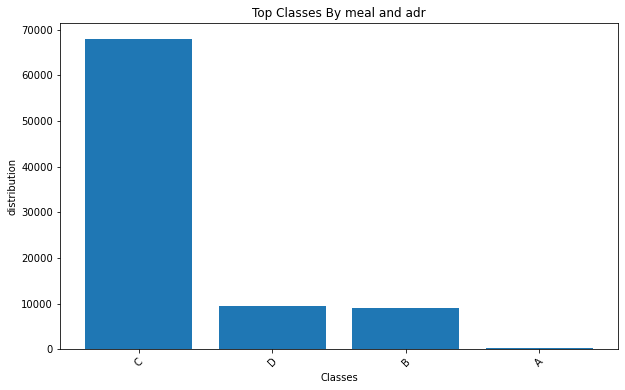

In [371]:
plt.figure(figsize=(10, 6)) 
plt.bar(top_classes.index, top_classes.values) 
plt.xticks(rotation=45) 
plt.xlabel('Classes') 
plt.ylabel('distribution') 
plt.title('Top Classes By meal and adr') 
plt.show()

- We see that the majority of the reservations are from class (C)

### 11- What is the class has a top of perecnt of cancellation ?

In [372]:
df2.groupby('reservation_status')['adr'].mean().sort_values(ascending=False)

reservation_status
Canceled     117.363354
Check-Out    101.585880
No-Show       99.121526
Name: adr, dtype: float64

In [373]:
df2[df2['is_canceled'] == 1].groupby('meal_classes')['adr'].mean()

meal_classes
A    130.302626
B    146.938982
C    115.436747
D    100.247992
Name: adr, dtype: float64

- We look The classes A and B have a highest percentage of cancellation

# 6- Building Machine Learning Model 

### 1- Fix Object Cols By Encoder

In [374]:
coreelation = df2.corr
correlation['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.187060
adr                               0.135515
arrival_date_year                 0.087460
stays_in_week_nights              0.082769
stays_in_weekend_nights           0.059587
arrival_date_day_of_month         0.005063
days_in_waiting_list              0.004443
arrival_date_month                0.003179
arrival_date_week_number          0.000919
babies                           -0.020587
agent                            -0.033419
previous_bookings_not_canceled   -0.050554
is_repeated_guest                -0.090144
booking_changes                  -0.094049
total_of_special_requests        -0.121593
required_car_parking_spaces      -0.183705
Name: is_canceled, dtype: float64

In [375]:
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,Month,Year,Day_name,meal_adr,meal_classes
0,Resort Hotel,0,305.8,2015,7,27,1,0,0,0,BB,PRT,Direct,Direct,0,0,C,C,3,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,7,2015,Wednesday,103.384490,C
1,Resort Hotel,0,305.8,2015,7,27,1,0,0,0,BB,PRT,Direct,Direct,0,0,C,C,4,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,7,2015,Wednesday,103.384490,C
2,Resort Hotel,0,7.0,2015,7,27,1,0,1,0,BB,GBR,Direct,Direct,0,0,A,C,0,No Deposit,14.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,7,2015,Thursday,103.384490,C
3,Resort Hotel,0,13.0,2015,7,27,1,0,1,0,BB,GBR,Corporate,Corporate,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,7,2015,Thursday,103.384490,C
4,Resort Hotel,0,14.0,2015,7,27,1,0,2,0,BB,GBR,Online TA,TA/TO,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,7,2015,Friday,103.384490,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23.0,2017,8,35,30,2,5,0,BB,BEL,Offline TA/TO,TA/TO,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-01,9,2017,Wednesday,103.384490,C
119386,City Hotel,0,102.0,2017,8,35,31,2,5,0,BB,FRA,Online TA,TA/TO,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-01,9,2017,Thursday,103.384490,C
119387,City Hotel,0,34.0,2017,8,35,31,2,5,0,BB,DEU,Online TA,TA/TO,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-01,9,2017,Thursday,103.384490,C
119388,City Hotel,0,109.0,2017,8,35,31,2,5,0,BB,GBR,Online TA,TA/TO,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-01,9,2017,Thursday,103.384490,C


In [376]:
df2.drop(['country', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'arrival_date', 'Month', 'Year', 'Day_name', 'reservation_status_date', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_week_nights', 'babies', 'is_repeated_guest'], axis=1, inplace=True)

In [377]:
df2

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,meal,market_segment,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,meal_adr,meal_classes
0,Resort Hotel,0,305.8,7,0,BB,Direct,0,3,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,103.384490,C
1,Resort Hotel,0,305.8,7,0,BB,Direct,0,4,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,103.384490,C
2,Resort Hotel,0,7.0,7,0,BB,Direct,0,0,No Deposit,14.0,0,Transient,75.00,0,0,Check-Out,103.384490,C
3,Resort Hotel,0,13.0,7,0,BB,Corporate,0,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,103.384490,C
4,Resort Hotel,0,14.0,7,0,BB,Online TA,0,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,103.384490,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23.0,8,2,BB,Offline TA/TO,0,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,103.384490,C
119386,City Hotel,0,102.0,8,2,BB,Online TA,0,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,103.384490,C
119387,City Hotel,0,34.0,8,2,BB,Online TA,0,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,103.384490,C
119388,City Hotel,0,109.0,8,2,BB,Online TA,0,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,103.384490,C


In [378]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86906 entries, 0 to 119389
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86906 non-null  object 
 1   is_canceled                     86906 non-null  int64  
 2   lead_time                       86906 non-null  float64
 3   arrival_date_month              86906 non-null  int64  
 4   stays_in_weekend_nights         86906 non-null  int64  
 5   meal                            86906 non-null  object 
 6   market_segment                  86906 non-null  object 
 7   previous_bookings_not_canceled  86906 non-null  int64  
 8   booking_changes                 86906 non-null  int64  
 9   deposit_type                    86906 non-null  object 
 10  agent                           86906 non-null  float64
 11  days_in_waiting_list            86906 non-null  int64  
 12  customer_type                  

In [379]:
df2['meal_classes'] = df2['meal_classes'].replace({'A':1,'B':2,'C':3,'D':4})
df2['meal_classes'].value_counts()

3    68022
4     9473
2     9052
1      359
Name: meal_classes, dtype: int64

In [380]:
df3 = pd.get_dummies(df2, columns=['hotel', 'meal', 'market_segment', 'deposit_type', 'customer_type', 'reservation_status'])
df3

,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,meal_adr,meal_classes,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,305.8,7,0,0,3,14.0,0,0.00,0,0,103.384490,3,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,0,305.8,7,0,0,4,14.0,0,0.00,0,0,103.384490,3,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2,0,7.0,7,0,0,0,14.0,0,75.00,0,0,103.384490,3,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,13.0,7,0,0,0,304.0,0,75.00,0,0,103.384490,3,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
4,0,14.0,7,0,0,0,240.0,0,98.00,0,1,103.384490,3,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23.0,8,2,0,0,394.0,0,96.14,0,0,103.384490,3,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
119386,0,102.0,8,2,0,0,9.0,0,225.43,0,2,103.384490,3,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
119387,0,34.0,8,2,0,0,9.0,0,157.71,0,4,103.384490,3,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
119388,0,109.0,8,2,0,0,89.0,0,104.40,0,0,103.384490,3,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0


In [381]:
df3['is_canceled'].value_counts(normalize=True)

0    0.72415
1    0.27585
Name: is_canceled, dtype: float64

- Data Imbalanced We will use SMOTE to fix this or we depend on F1_score accuracy

In [382]:
df3.describe()

,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,meal_adr,meal_classes,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
count,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.000000,86906.00000,86906.000000,86906.000000
mean,0.275850,78.907686,6.476457,1.007502,0.176777,0.271891,91.525769,0.751789,105.726300,0.083469,0.699572,105.726300,2.996583,0.614411,0.385589,0.782708,0.004131,0.104159,0.109003,0.002612,0.008032,0.046337,0.133972,0.056797,0.159448,0.592778,0.000023,0.986836,0.011932,0.001231,0.036119,0.006179,0.823234,0.134467,0.26424,0.724150,0.011610
std,0.446944,81.771238,3.092815,1.028813,1.718218,0.728176,109.877673,10.026561,49.503739,0.280434,0.831871,8.636576,0.479245,0.486737,0.486737,0.412405,0.064140,0.305468,0.311645,0.051041,0.089259,0.210216,0.340625,0.231456,0.366096,0.491320,0.004797,0.113976,0.108583,0.035067,0.186589,0.078364,0.381472,0.341155,0.44093,0.446944,0.107124
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,98.349905,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,12.000000,4.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.250000,0.000000,0.000000,103.384490,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,50.000000,7.000000,1.000000,0.000000,0.000000,14.000000,0.000000,98.400000,0.000000,0.000000,103.384490,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000
75%,1.000000,125.000000,9.000000,2.000000,0.000000,0.000000,240.000000,0.000000,134.100000,0.000000,1.000000,103.384490,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.000000
max,1.000000,305.800000,12.000000,16.000000,72.000000,21.000000,535.000000,391.000000,233.060000,8.000000,5.000000,136.016379,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### 2- Feature Selection

In [383]:
X = df3.drop(columns=['is_canceled'])
y = df3['is_canceled']

In [384]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44, shuffle=True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (60834, 36)
X_test shape is  (26072, 36)
y_train shape is  (60834,)
y_test shape is  (26072,)


In [385]:
FeatureSelection = SelectKBest(score_func= f_classif ,k=25)
X_Selected = FeatureSelection.fit_transform(X, y)
df4 = pd.DataFrame(X_Selected,columns = [i for i,j in zip(X.columns,FeatureSelection.get_support()) if j])
df4

c:\Users\MEGASTORE\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


,lead_time,stays_in_weekend_nights,previous_bookings_not_canceled,booking_changes,agent,adr,required_car_parking_spaces,total_of_special_requests,meal_classes,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_SC,market_segment_Corporate,market_segment_Direct,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_No Deposit,deposit_type_Non Refund,customer_type_Contract,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,305.8,0.0,0.0,3.0,14.0,0.00,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,305.8,0.0,0.0,4.0,14.0,0.00,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7.0,0.0,0.0,0.0,14.0,75.00,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,13.0,0.0,0.0,0.0,304.0,75.00,0.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,14.0,0.0,0.0,0.0,240.0,98.00,0.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86901,23.0,2.0,0.0,0.0,394.0,96.14,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
86902,102.0,2.0,0.0,0.0,9.0,225.43,0.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
86903,34.0,2.0,0.0,0.0,9.0,157.71,0.0,4.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
86904,109.0,2.0,0.0,0.0,89.0,104.40,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Train different Models

## 1- Logistic Regression

In [386]:
X_train, X_test, y_train, y_test = train_test_split(X_Selected, y, test_size=0.3, random_state=44, shuffle=True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (60834, 25)
X_test shape is  (26072, 25)
y_train shape is  (60834,)
y_test shape is  (26072,)


In [387]:
over_sample = SMOTE(random_state=44)
os_X, os_y = over_sample.fit_resample(X_train, y_train)

In [388]:
Logistic_Model = LogisticRegression()
Logistic_Model.fit(os_X, os_y)

c:\Users\MEGASTORE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [389]:
y_pred = Logistic_Model.predict(X_test)

In [390]:
Logistic_accuracy = accuracy_score(y_test, y_pred)
Logistic_accuracy

0.999961644676281

In [391]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[18941,     0],
       [    1,  7130]], dtype=int64)

In [392]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18941
           1       1.00      1.00      1.00      7131

    accuracy                           1.00     26072
   macro avg       1.00      1.00      1.00     26072
weighted avg       1.00      1.00      1.00     26072



## 2- SVM

In [393]:
X_train , X_test, y_train , y_test = train_test_split(X_Selected, y, test_size=0.3, random_state=44, shuffle=True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (60834, 25)
X_test shape is  (26072, 25)
y_train shape is  (60834,)
y_test shape is  (26072,)


In [394]:
over_sample = SMOTE(random_state=44)
os_X, os_y = over_sample.fit_resample(X_train, y_train)

In [395]:
svc = SVC()
svc.fit(os_X, os_y)

SVC()

In [396]:
y_pred = svc.predict(X_test)

In [397]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9621816508131329

In [398]:
X_train , X_test, y_train , y_test = train_test_split(X_Selected, y, test_size=0.3, random_state=44, shuffle=True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (60834, 25)
X_test shape is  (26072, 25)
y_train shape is  (60834,)
y_test shape is  (26072,)


In [399]:
over_sample = SMOTE(random_state=44)
os_X, os_y = over_sample.fit_resample(X_train, y_train)

## 2- SVM (Random Search)

In [400]:
parameters = [ {'C':[1, 10, 100], 'kernel':['linear']},
               {'C':[1, 10, 100], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]},
               {'C':[1, 10, 100], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03]} 
              ]

random_search = RandomizedSearchCV(estimator=svc, param_distributions=parameters, scoring='accuracy', cv=2, verbose=1, n_jobs=-1)

random_search.fit(os_X, os_y)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
                   param_distributions=[{'C': [1, 10, 100],
                                         'kernel': ['linear']},
                                        {'C': [1, 10, 100],
                                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                   0.6],
                                         'kernel': ['rbf']},
                                        {'C': [1, 10, 100], 'degree': [2, 3, 4],
                                         'gamma': [0.01, 0.02, 0.03],
                                         'kernel': ['poly']}],
                   scoring='accuracy', verbose=1)

In [401]:
print('random_search CV best score : {:.4f}\n\n'.format(random_search.best_score_))

random_search CV best score : 1.0000




In [402]:
print('Parameters that give the best results :','\n\n', (random_search.best_params_))


Parameters that give the best results : 

 {'kernel': 'linear', 'C': 100}


In [403]:
print('\n\nEstimator that was chosen by the search :','\n\n', (random_search.best_estimator_))



Estimator that was chosen by the search : 

 SVC(C=100, kernel='linear')


In [404]:
print('random_search CV score on test set: {0:0.4f}'.format(random_search.score(X_test, y_test)))

random_search CV score on test set: 1.0000


In [405]:
print('training score is:{:.3f}'.format(random_search.score(X_train, y_train)))
print('test score is: {:.3f}'.format(random_search.score(X_test, y_test)))

training score is:1.000
test score is: 1.000


## 3- Random Forest

In [406]:
X_train , X_test, y_train , y_test = train_test_split(X_Selected, y, test_size=0.3, random_state=44, shuffle=True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (60834, 25)
X_test shape is  (26072, 25)
y_train shape is  (60834,)
y_test shape is  (26072,)


In [407]:
over_sample = SMOTE(random_state=44)
os_X, os_y = over_sample.fit_resample(X_train, y_train)

In [408]:
rfc = RandomForestClassifier(criterion='entropy',max_depth=10 ,n_estimators=100)

rfc.fit(os_X, os_y)

y_pred = rfc.predict(X_test)

In [409]:
accuracy_rf = accuracy_score(y_test, y_pred)
accuracy_rf

1.0

### i think it  doesn't make sense that the accuracy of SVM(RS) and RandomForest is so accurate , so i think the best model is (SVM)